## GRADIENT DESCENT MULTIPLAS VARIÁVEIS

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline


## ABRINDO DATAFRAME DE PREÇOS DE APARTAMENTOS

In [411]:
df = pd.read_csv('prices.csv')
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Pré-processamento
### Standard score

In [412]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## PEGANDO O NÚMERO DE FEATURES

In [413]:
n_features = len(df_norm.columns)-1
n_features

2

## Criando um vetor de W's baseado na quantidades de features

In [414]:
w = np.random.rand(1,n_features+1) ## Gerando valores aleatórios entre 0 e 1
w

array([[0.04573418, 0.91401007, 0.77526032]])

## TRANSFORMANDO O DATAFRAME EM NUMPY  X,y

In [415]:
X = np.array(df_norm.drop('price', axis=1))

y = df_norm.iloc[:, 2:3].values


## CRIANDO X-zero com valores = 1

In [416]:
## criando uma função
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

## DEFININDO CUSTO

In [417]:
def custo(w,X,y):
    m = len(X)
    
    erro = (X@w.T - y)
    
    custo = np.sum(np.power(erro,2))
    
    return custo/m


## GRADIENT DESCENT

In [418]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        
        cost[i] = custo(w, X, y)
    
    return w, cost
    

## INICIALIZANDO

In [419]:
X = insert_ones(X)

In [420]:
alpha = 0.01
epoch = 800

## RODANDO TUDO

In [421]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

## Custo final

In [422]:
custo(w, X, y)

0.2615107943955559

## MOSTRANDO O CUSTO

Text(0.5,1,'Erro vs. Epoch')

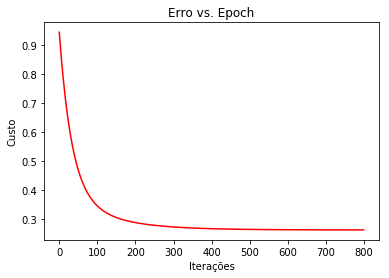

In [423]:
#plotando o custo
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')  

## MOSTRANDO OS PESOS

In [424]:
w

array([[ 1.47365748e-05,  8.72117961e-01, -4.05269216e-02]])

## PREDIÇÃO - DESAFIO

PARA REALIZAR UMA REGRESSÃO USANDO MÚLTIPLAS VARIÁVEIS

1. Receber novos valores para [[size, bedroom]]
2. Pré-processar usando a média e desvio padrão do conjunto original
3. Realizar a regressão no modelo X@w.T
4. Despadronizar o valor da predição obtendo o valor final da regressão